In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/ratvsbat/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [ ]:
# =======================================================
# Data Cleaning Function
# =======================================================
def clean_data(df, required_cols):
    """Remove rows only if required columns are null or invalid."""
    df = df.dropna(subset=required_cols)  # drop rows missing key columns
    for col in required_cols:
        if pd.api.types.is_numeric_dtype(df[col]):
            df = df[df[col] >= 0]  # remove invalid negative values
    return df

In [ ]:
# Load Datasets
df1 = pd.read_csv(path + "dataset1.csv")
# print(df1)
df2 = pd.read_csv(path + "dataset2.csv")
# print(df2)

In [ ]:
# =======================================================
# Dataset 1: Bat hesitation (latency to food)
# =======================================================
df1 = clean_data(df1, ["bat_landing_to_food", "habit"])

# Normalize habit column
df1['habit'] = df1['habit'].str.lower()

# Assign rat presence/absence with exclusions
df1['rat_present'] = df1['habit'].apply(
    lambda x: (
        'Yes' if ('rat' in x and not any(word in x for word in ['other', 'others', 'no_food']))
        else (
            'No' if not any(word in x for word in ['rat','other','others','no_food'])
            else 'Exclude'
        )
    )
)

# Keep only valid rows (Yes/No)
df1 = df1[df1['rat_present'] != 'Exclude']
print(df1)

           start_time  bat_landing_to_food     habit  rat_period_start  \
0    30/12/2017 18:37            16.000000       rat  30/12/2017 18:35   
1    30/12/2017 19:51             0.074016      fast  30/12/2017 19:50   
2    30/12/2017 19:51             4.000000      fast  30/12/2017 19:50   
3    30/12/2017 19:52            10.000000       rat  30/12/2017 19:50   
4    30/12/2017 19:54            15.000000       rat  30/12/2017 19:50   
..                ...                  ...       ...               ...   
902    4/05/2018 4:18             2.000000       rat    4/05/2018 4:14   
903    4/05/2018 4:18             1.000000      fast    4/05/2018 4:14   
904    4/05/2018 4:19            22.000000      pick    4/05/2018 4:14   
905   3/05/2018 23:51             2.000000      fast   3/05/2018 23:46   
906    4/05/2018 5:39           120.000000  pick_rat    4/05/2018 5:37   

       rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0    30/12/2017 18:38                 

In [ ]:
# Assign months with season
df1['season'] = df1['month'].apply(
    lambda x: (
        'winter' if (x in [0, 1, 2])
        else (
            'spring' if (x in [3, 4, 5])
            else 'other'
        )
    ))

# Keep only required rows
df1 = df1[df1['season'] != 'other']
print(df1)

           start_time  bat_landing_to_food     habit  rat_period_start  \
0    30/12/2017 18:37            16.000000       rat  30/12/2017 18:35   
1    30/12/2017 19:51             0.074016      fast  30/12/2017 19:50   
2    30/12/2017 19:51             4.000000      fast  30/12/2017 19:50   
3    30/12/2017 19:52            10.000000       rat  30/12/2017 19:50   
4    30/12/2017 19:54            15.000000       rat  30/12/2017 19:50   
..                ...                  ...       ...               ...   
902    4/05/2018 4:18             2.000000       rat    4/05/2018 4:14   
903    4/05/2018 4:18             1.000000      fast    4/05/2018 4:14   
904    4/05/2018 4:19            22.000000      pick    4/05/2018 4:14   
905   3/05/2018 23:51             2.000000      fast   3/05/2018 23:46   
906    4/05/2018 5:39           120.000000  pick_rat    4/05/2018 5:37   

       rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0    30/12/2017 18:38                 

  rat_present  bat_landing_to_food
0          No            10.891697
1         Yes            13.328281


/tmp/ipython-input-1370877902.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_landing_time, x='rat_present', y='bat_landing_to_food',


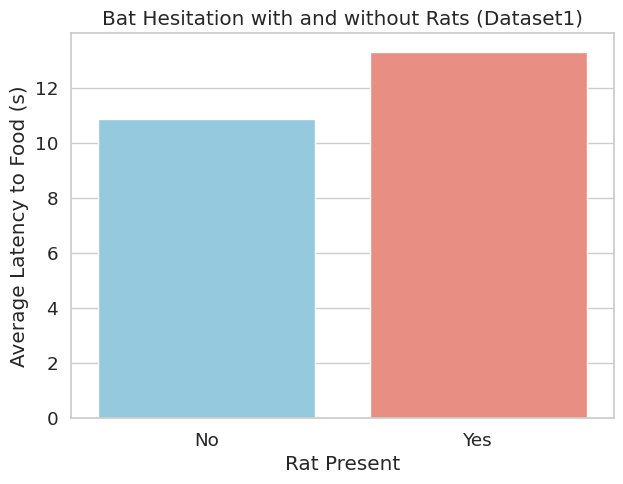

In [ ]:
# Average landing times
avg_landing_time = df1.groupby('rat_present')['bat_landing_to_food'].mean().reset_index()
print(avg_landing_time)
plt.figure(figsize=(7,5))
sns.barplot(data=avg_landing_time, x='rat_present', y='bat_landing_to_food',
            palette=['skyblue','salmon'], errorbar="sd")
plt.ylabel('Average Latency to Food (s)')
plt.xlabel('Rat Present')
plt.title('Bat Hesitation with and without Rats (Dataset1)')
plt.show()

   season rat_present  bat_landing_to_food
0  spring          No            11.695003
1  spring         Yes            15.907716
2  winter          No             4.625913
3  winter         Yes             5.589977


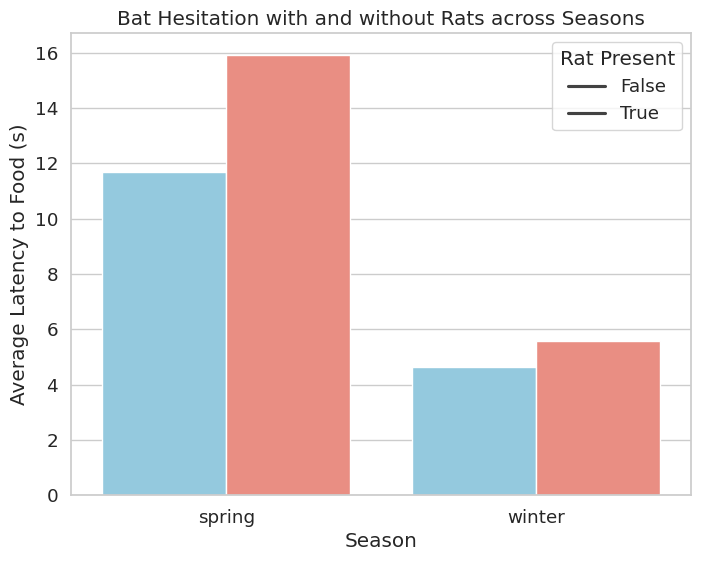

In [ ]:
# Average landing times for both seasons
avg_landing_time = (
    df1.groupby(['season', 'rat_present'])['bat_landing_to_food']
    .mean()
    .reset_index()
)

print(avg_landing_time)

plt.figure(figsize=(8,6))
sns.barplot(
    data=avg_landing_time,
    x='season',                # show Winter vs Spring on X-axis
    y='bat_landing_to_food',
    hue='rat_present',         # show True/False side by side
    palette=['skyblue', 'salmon'],
    errorbar="sd"
)

plt.ylabel('Average Latency to Food (s)')
plt.xlabel('Season')
plt.title('Bat Hesitation with and without Rats across Seasons')
plt.legend(title='Rat Present', labels=['False', 'True'])
plt.show()


In [ ]:
# T-test
hesitation_rat_present = df1[df1['rat_present']=='Yes']['bat_landing_to_food']
hesitation_no_rat = df1[df1['rat_present']=='No']['bat_landing_to_food']
t_stat, p_value = stats.ttest_ind(hesitation_rat_present, hesitation_no_rat, equal_var=False)

print("\n--- T-test Results for Bat Hesitation ---")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.10f}")
print("Significant" if p_value < 0.05 else "Not Significant")


--- T-test Results for Bat Hesitation ---
T-statistic: 1.3140
P-value: 0.1892059472
Not Significant


In [ ]:
print("\n--- T-test Results for Rat Presence Effect Within Each Season ---")

for season in df1['season'].unique():
    # Separate by rat presence within this season
    with_rat = df1[(df1['season'] == season) & (df1['rat_present'] == 'Yes')]['bat_landing_to_food']
    without_rat = df1[(df1['season'] == season) & (df1['rat_present'] == 'No')]['bat_landing_to_food']

    # Welch’s T-test
    t_stat, p_value = stats.ttest_ind(with_rat, without_rat, equal_var=False)

    # Confidence interval for difference
    diff_mean = with_rat.mean() - without_rat.mean()
    n1, n2 = len(with_rat), len(without_rat)
    se = np.sqrt(with_rat.var(ddof=1)/n1 + without_rat.var(ddof=1)/n2)

    if se == 0:
        ci_low = ci_high = diff_mean
    else:
        ci_low, ci_high = diff_mean - 1.96*se, diff_mean + 1.96*se

    # Print results
    print(f"\nSeason: {season}")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.10f}")
    print(f"Mean Difference (Rat - No Rat): {diff_mean:.4f}")
    print(f"95% Confidence Interval: [{ci_low:.4f}, {ci_high:.4f}]")
    print("Significant" if p_value < 0.05 else "Not Significant")



--- T-test Results for Rat Presence Effect Within Each Season ---

Season: winter
T-statistic: 0.8167
P-value: 0.4155695118
Mean Difference (Rat - No Rat): 0.9641
95% Confidence Interval: [-1.3497, 3.2779]
Not Significant

Season: spring
T-statistic: 1.8895
P-value: 0.0593155451
Mean Difference (Rat - No Rat): 4.2127
95% Confidence Interval: [-0.1571, 8.5826]
Not Significant


In [ ]:
print("\n--- Chi-square Test Results for Rat Presence Effect Within Each Season ---")

# Categorize hesitation as 'High' or 'Low' based on median
threshold = df1['bat_landing_to_food'].median()
print(f"Global hesitation threshold (median): {threshold:.2f}")

# Create new categorical variable
df1['hesitation_level'] = np.where(df1['bat_landing_to_food'] > threshold, 'High', 'Low')

# Loop through each season
for season in df1['season'].unique():
    season_data = df1[df1['season'] == season]

    # Contingency table: Rat presence vs hesitation level
    contingency_table = pd.crosstab(season_data['rat_present'], season_data['hesitation_level'])

    # Perform Chi-square test of independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print results
    print(f"\nSeason: {season}")
    print("Contingency Table:")
    print(contingency_table)
    print(f"\nChi2 Statistic: {chi2:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"P-value: {p:.10f}")
    print("Significant" if p < 0.05 else "Not Significant")



--- Chi-square Test Results for Rat Presence Effect Within Each Season ---
Global hesitation threshold (median): 4.00

Season: winter
Contingency Table:
hesitation_level  High  Low
rat_present                
No                  19   41
Yes                 23   54

Chi2 Statistic: 0.0016
Degrees of Freedom: 1
P-value: 0.9684682685
Not Significant

Season: spring
Contingency Table:
hesitation_level  High  Low
rat_present                
No                 187  281
Yes                147   84

Chi2 Statistic: 33.8131
Degrees of Freedom: 1
P-value: 0.0000000061
Significant


In [ ]:
# =======================================================
# Dataset 2: Bat landing activity
# =======================================================
df2 = clean_data(df2, ["bat_landing_number", "rat_arrival_number", "rat_minutes"])

df2['rat_present'] = df2['rat_arrival_number'].apply(lambda x: 'Yes' if x > 0 else 'No')
print(df2)

                  time  month  hours_after_sunset  bat_landing_number  \
0     26/12/2017 16:13      0                -0.5                  20   
1     26/12/2017 16:43      0                 0.0                  28   
2     26/12/2017 17:13      0                 0.5                  25   
3     26/12/2017 17:43      0                 1.0                  71   
4     26/12/2017 18:13      0                 1.5                  44   
...                ...    ...                 ...                 ...   
2118    1/06/2018 3:41      6                 8.0                  20   
2119    1/06/2018 4:11      6                 8.5                   7   
2120    1/06/2018 4:41      6                 9.0                   6   
2121    1/06/2018 5:11      6                 9.5                   7   
2122    1/06/2018 5:41      6                10.0                   2   

      food_availability  rat_minutes  rat_arrival_number rat_present  
0              4.000000          0.0                

In [ ]:
# Assign months with season
df2['season'] = df2['month'].apply(
    lambda x: (
        'winter' if (x in [0, 1, 2])
        else (
            'spring' if (x in [3, 4, 5])
            else 'other'
        )
    ))

# Keep only required rows
df2 = df2[df2['season'] != 'other']
print(df2)

                  time  month  hours_after_sunset  bat_landing_number  \
0     26/12/2017 16:13      0                -0.5                  20   
1     26/12/2017 16:43      0                 0.0                  28   
2     26/12/2017 17:13      0                 0.5                  25   
3     26/12/2017 17:43      0                 1.0                  71   
4     26/12/2017 18:13      0                 1.5                  44   
...                ...    ...                 ...                 ...   
2106  31/05/2018 21:41      5                 2.0                  37   
2107  31/05/2018 22:11      5                 2.5                  41   
2108  31/05/2018 22:41      5                 3.0                  27   
2109  31/05/2018 23:11      5                 3.5                  39   
2110  31/05/2018 23:41      5                 4.0                  52   

      food_availability  rat_minutes  rat_arrival_number rat_present  season  
0              4.000000     0.000000        

    hours_after_sunset rat_present  bat_landing_number
0                 -2.0          No            9.514286
1                 -2.0         Yes            5.000000
2                 -1.5          No           11.976744
3                 -1.5         Yes            6.750000
4                 -1.0          No           13.060000
..                 ...         ...                 ...
59                12.5         Yes            2.333333
60                13.0          No            2.923077
61                13.0         Yes            2.400000
62                13.5          No            3.400000
63                13.5         Yes            2.500000

[64 rows x 3 columns]


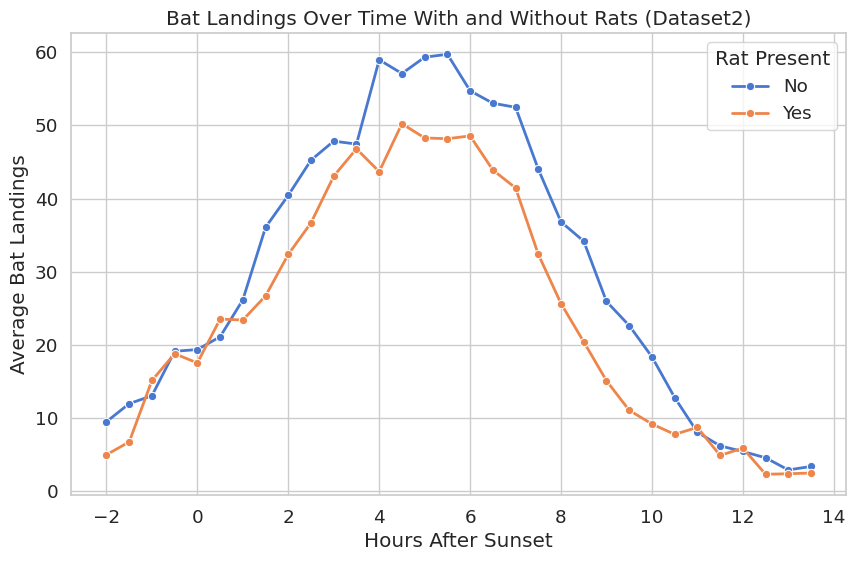

In [ ]:
# Average bat landings over time
grouped_df = df2.groupby(['hours_after_sunset','rat_present'])['bat_landing_number'].mean().reset_index()
print(grouped_df)
plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_df, x='hours_after_sunset', y='bat_landing_number',
             hue='rat_present', marker='o', linewidth=2)
plt.xlabel('Hours After Sunset')
plt.ylabel('Average Bat Landings')
plt.title('Bat Landings Over Time With and Without Rats (Dataset2)')
plt.legend(title='Rat Present')
plt.show()

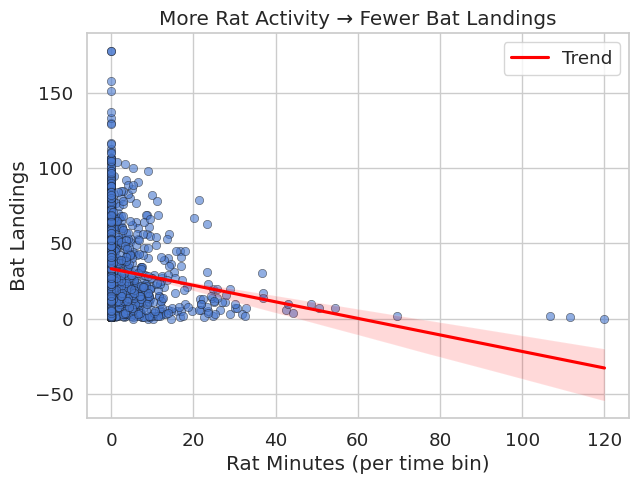

In [ ]:
# Scatter with regression line
plt.figure(figsize=(7,5))
sns.scatterplot(data=df2, x='rat_minutes', y='bat_landing_number', alpha=0.6, edgecolor="k")
sns.regplot(data=df2, x='rat_minutes', y='bat_landing_number',
            scatter=False, color='red', label='Trend')
plt.xlabel('Rat Minutes (per time bin)')
plt.ylabel('Bat Landings')
plt.title('More Rat Activity → Fewer Bat Landings')
plt.legend()
plt.show()

In [ ]:
# T-test
activity_rat_present = df2[df2['rat_present']=='Yes']['bat_landing_number']
activity_no_rat = df2[df2['rat_present']=='No']['bat_landing_number']
t_stat2, p_value2 = stats.ttest_ind(activity_rat_present, activity_no_rat, equal_var=False)

print("\n--- T-test Results for Bat Activity ---")
print(f"T-statistic: {t_stat2:.4f}")
print(f"P-value: {p_value2:.10f}")
print("Significant" if p_value2 < 0.05 else "Not Significant")



--- T-test Results for Bat Activity ---
T-statistic: -5.0306
P-value: 0.0000005700
Significant


   season  hours_after_sunset rat_present  bat_landing_number
0  spring                -2.0          No           10.032258
1  spring                -2.0         Yes            5.000000
2  spring                -1.5          No           13.878788
3  spring                -1.5         Yes            6.750000
4  spring                -1.0          No           15.941176


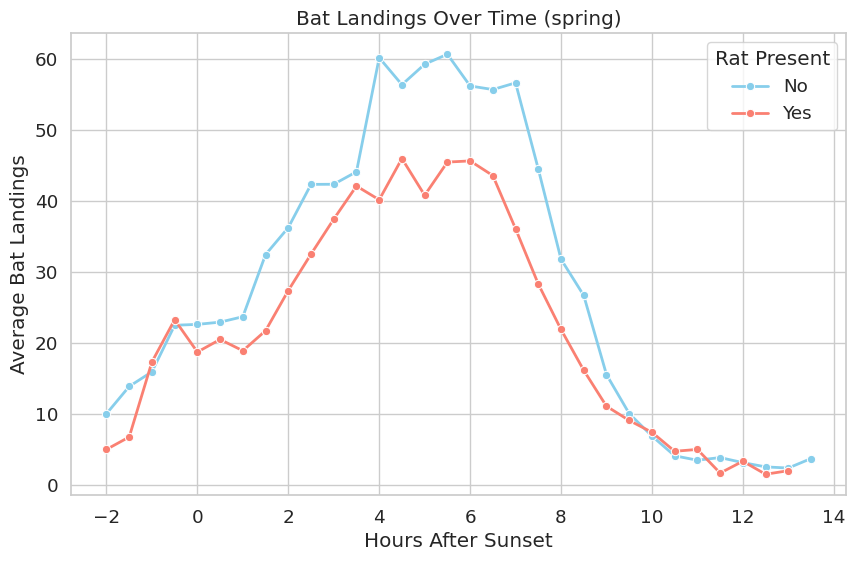

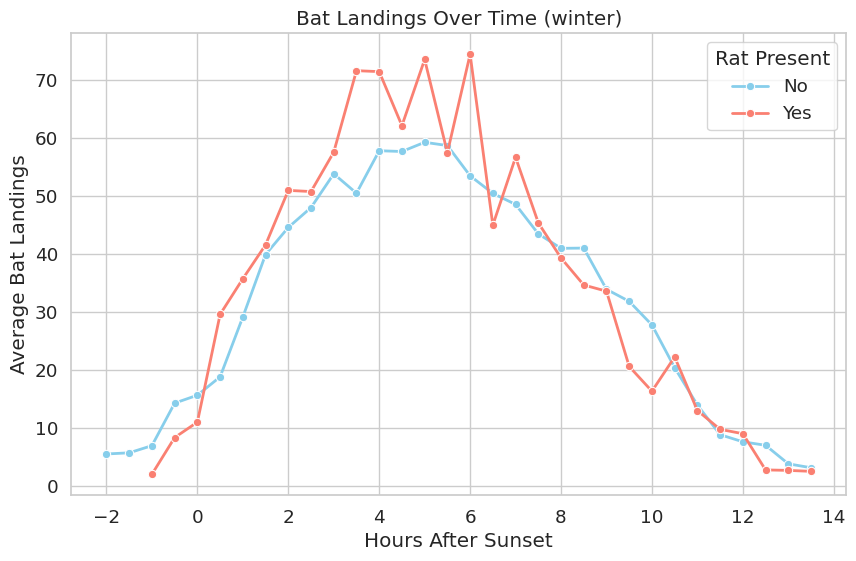

In [ ]:
# Average bat landings over time by season
grouped_df = (
    df2.groupby(['season', 'hours_after_sunset', 'rat_present'])['bat_landing_number']
    .mean()
    .reset_index()
)

print(grouped_df.head())

# Create separate plots for each season
seasons = grouped_df['season'].unique()

for season in seasons:
    season_data = grouped_df[grouped_df['season'] == season]

    plt.figure(figsize=(10,6))
    sns.lineplot(
        data=season_data,
        x='hours_after_sunset',
        y='bat_landing_number',
        hue='rat_present',
        marker='o',
        linewidth=2,
        palette=['skyblue', 'salmon']
    )
    plt.xlabel('Hours After Sunset')
    plt.ylabel('Average Bat Landings')
    plt.title(f'Bat Landings Over Time ({season})')
    plt.legend(title='Rat Present')
    plt.show()



--- Total Rat Arrival Number by Hour (per Season) ---
    season  hours_after_sunset  rat_arrival_number
0   spring                -2.0                   3
1   spring                -1.5                   4
2   spring                -1.0                   7
3   spring                -0.5                  10
4   spring                 0.0                  15
..     ...                 ...                 ...
56  winter                11.5                   4
57  winter                12.0                   5
58  winter                12.5                   4
59  winter                13.0                   3
60  winter                13.5                   2

[61 rows x 3 columns]


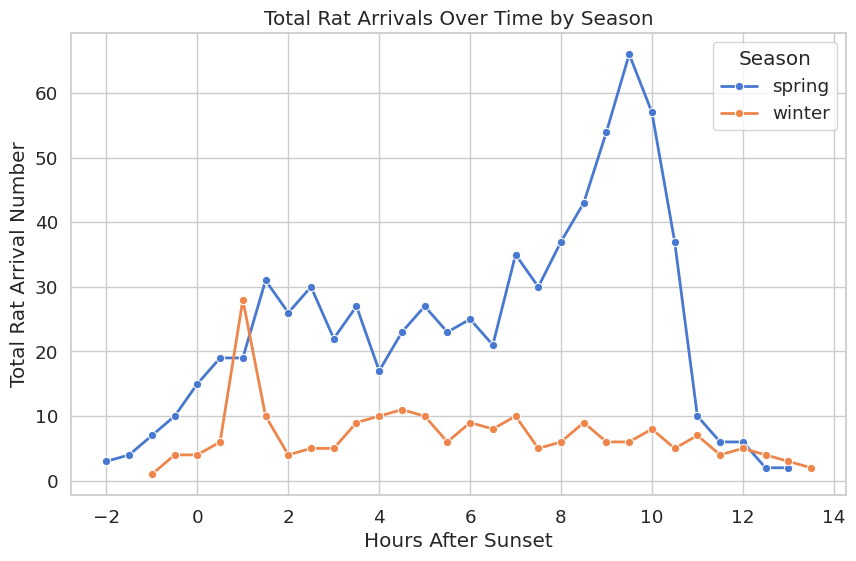

In [ ]:
# Filter for rat-present data
rat_present_data = df2[df2['rat_present'] == 'Yes']

# Group by season and hours_after_sunset, calculate total arrivals
total_rat_arrival_by_hour = (
    rat_present_data.groupby(['season', 'hours_after_sunset'])['rat_arrival_number']
    .sum()
    .reset_index()
)

print("\n--- Total Rat Arrival Number by Hour (per Season) ---")
print(total_rat_arrival_by_hour)

# Plot both seasons on one chart
plt.figure(figsize=(10,6))
sns.lineplot(
    data=total_rat_arrival_by_hour,
    x='hours_after_sunset',
    y='rat_arrival_number',
    hue='season',
    marker='o',
    linewidth=2
)

plt.xlabel('Hours After Sunset')
plt.ylabel('Total Rat Arrival Number')
plt.title('Total Rat Arrivals Over Time by Season')
plt.legend(title='Season')
plt.show()


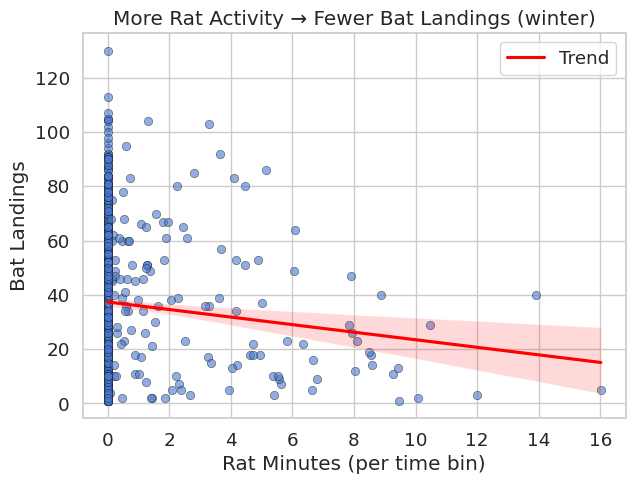

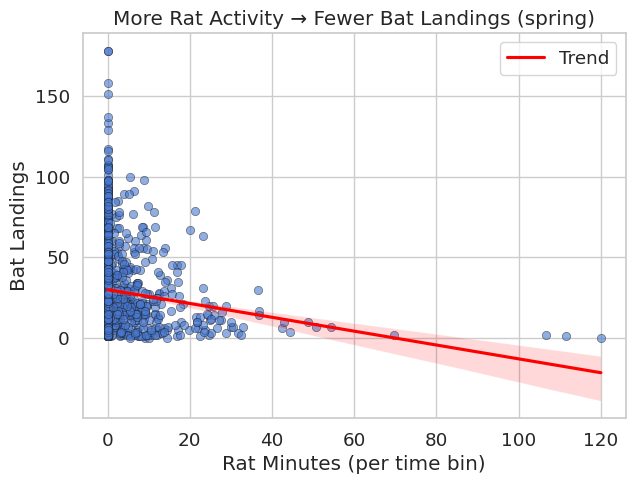

In [ ]:
# Create scatter plots with regression lines for each season
seasons = df2['season'].unique()

for season in seasons:
    season_data = df2[df2['season'] == season]

    plt.figure(figsize=(7,5))
    sns.scatterplot(
        data=season_data,
        x='rat_minutes',
        y='bat_landing_number',
        alpha=0.6,
        edgecolor='k'
    )
    sns.regplot(
        data=season_data,
        x='rat_minutes',
        y='bat_landing_number',
        scatter=False,
        color='red',
        label='Trend'
    )
    plt.xlabel('Rat Minutes (per time bin)')
    plt.ylabel('Bat Landings')
    plt.title(f'More Rat Activity → Fewer Bat Landings ({season})')
    plt.legend()
    plt.show()


In [ ]:
# Get unique seasons
seasons = df2['season'].unique()

for season in seasons:
    season_data = df2[df2['season'] == season]

    activity_rat_present = season_data[season_data['rat_present'] == 'Yes']['bat_landing_number']
    activity_no_rat = season_data[season_data['rat_present'] == 'No']['bat_landing_number']

    t_stat, p_value = stats.ttest_ind(activity_rat_present, activity_no_rat, equal_var=False)

    print(f"\n--- T-test Results for Bat Activity ({season}) ---")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.10f}")
    print("Significant" if p_value < 0.05 else "Not Significant")



--- T-test Results for Bat Activity (winter) ---
T-statistic: -0.2420
P-value: 0.8090784135
Not Significant

--- T-test Results for Bat Activity (spring) ---
T-statistic: -3.9433
P-value: 0.0000856130
Significant


In [ ]:
# Define threshold to categorize bat landings (e.g., above/below median)
threshold = df2['bat_landing_number'].median()

print(f"Categorizing 'bat_landing_number' by median threshold = {threshold:.2f}")

# Create a new categorical column for chi-square analysis
df2['activity_level'] = np.where(df2['bat_landing_number'] > threshold, 'High', 'Low')

# Run chi-square test for each season
for season in df2['season'].unique():
    season_data = df2[df2['season'] == season]

    contingency_table = pd.crosstab(season_data['rat_present'], season_data['activity_level'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"\n--- Chi-square Test Results for Bat Activity ({season}) ---")
    print("Contingency Table:")
    print(contingency_table)
    print(f"\nChi2 Statistic: {chi2:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"P-value: {p:.10f}")
    print("Significant" if p < 0.05 else "Not Significant")


Categorizing 'bat_landing_number' by median threshold = 27.00

--- Chi-square Test Results for Bat Activity (winter) ---
Contingency Table:
activity_level  High  Low
rat_present              
No               457  294
Yes               72   57

Chi2 Statistic: 0.9648
Degrees of Freedom: 1
P-value: 0.3259724074
Not Significant

--- Chi-square Test Results for Bat Activity (spring) ---
Contingency Table:
activity_level  High  Low
rat_present              
No               368  447
Yes              139  277

Chi2 Statistic: 15.1899
Degrees of Freedom: 1
P-value: 0.0000972206
Significant
